In [218]:
import torch
import numpy as np
import scipy

In [219]:
test_tensor = torch.randn(10,10)

In [220]:
test_tensor

tensor([[-0.6289,  0.1384, -0.5669,  2.3690, -2.0550,  1.1082,  0.3908,  1.0400,
         -0.3243, -0.4512],
        [ 2.0204,  1.1205, -1.5343,  1.4972, -0.1196,  2.2822,  1.4008,  1.6107,
         -0.5056,  1.3480],
        [-0.6440,  0.5574,  0.0961, -0.1577, -0.5968, -1.5472,  0.4082,  0.9728,
         -0.5897, -0.4593],
        [ 1.7727,  0.1303, -0.2228, -1.0785, -0.1068,  0.9518, -0.6476,  1.1465,
         -0.9887, -0.8163],
        [ 0.0925, -0.1094, -2.1177, -0.9997, -0.8016,  0.0587, -1.0559,  1.0155,
          0.2375,  0.9342],
        [-2.6003,  0.6928, -1.6956,  0.2050, -0.3142, -1.4027,  1.4009,  1.2082,
          0.1907, -1.0242],
        [ 1.1637, -0.4469,  2.1289, -0.8149,  1.4558, -0.5929, -0.5159,  0.0183,
         -0.6333, -0.8637],
        [-0.6389, -0.9054, -1.3132, -0.3583,  0.6922,  0.8053, -0.0789, -1.5258,
          0.9012, -0.6946],
        [-0.8918, -0.0548, -0.4903, -0.9998,  0.6302,  0.0388,  0.9900, -0.7580,
         -0.3336,  0.4173],
        [ 1.2778,  

In [221]:
def truncated_normal_(tensor):
        """
        Helper function to generate a truncated normal distribution 
        for initializing layers as done in (Ziv, Tishby. 2017) 
        """
        mean = 0
        std = 1/float(np.sqrt(tensor.shape[0]))
        size = tensor.shape
        tmp = tensor.new_empty(size + (4,)).normal_()
        valid = (tmp < 2) & (tmp > -2)
        ind = valid.max(-1, keepdim=True)[1]
        tensor.data.copy_(tmp.gather(-1, ind).squeeze(-1))
        tensor.data.mul_(std).add_(mean)
        return tensor

In [222]:
tt = truncated_normal_(test_tensor)

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

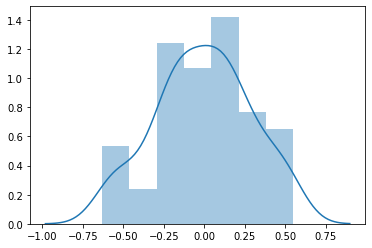

In [224]:
sns.distplot(tt)

In [225]:
from scipy import stats

In [226]:
-2*1/float(np.sqrt(test_tensor.shape[0]))

-0.6324555320336759

In [227]:
def truncnorm2(tensor):
    arr = tensor.numpy()
    a, b = -2, 2
    print(a,b)
    X = stats.truncnorm(a,b, loc=0, scale=1/float(np.sqrt(tensor.shape[0])))
    aa = X.rvs(arr.shape)
    return aa 

In [228]:
tt2 = truncnorm2(test_tensor)

-2 2


In [229]:
tt2

array([[-0.44137546,  0.05316093,  0.12725238, -0.04702236, -0.19558831,
        -0.23267969,  0.62974822,  0.16848239,  0.32270755,  0.38434042],
       [ 0.1494881 ,  0.23612673, -0.04250113, -0.17046354, -0.6176299 ,
        -0.24441882,  0.06352323,  0.35464152, -0.19322204,  0.02466658],
       [-0.50178807, -0.11982776,  0.03668644,  0.5710239 , -0.08979135,
         0.02517724,  0.42558436, -0.40185645,  0.46931673,  0.43125263],
       [ 0.39878286, -0.29431451,  0.38260661,  0.06896865,  0.14453068,
         0.39566029, -0.1073173 , -0.26117687,  0.10029819, -0.03608116],
       [ 0.1489697 , -0.14439551, -0.35504898, -0.04506382, -0.0731651 ,
        -0.01292562, -0.51954129, -0.3111947 , -0.08511459,  0.03788087],
       [-0.07672523, -0.19519123, -0.14091399, -0.09513058, -0.06011806,
        -0.27783852, -0.20874706,  0.05266989, -0.0307432 ,  0.16542344],
       [ 0.43065639,  0.09129695, -0.09254297,  0.29393466, -0.14223236,
         0.35364894,  0.45196849, -0.29242098

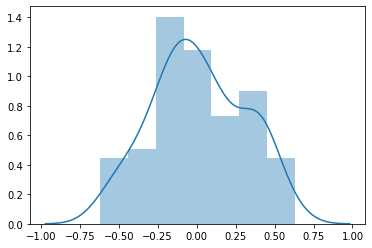

In [230]:
sns.distplot(tt2)

In [231]:
import math

In [232]:
def _no_grad_trunc_normal_(tensor, mean, std, a, b):
    # Method based on https://people.sc.fsu.edu/~jburkardt/presentations/truncated_normal.pdf
    def norm_cdf(x):
        # Computes standard normal cumulative distribution function
        return (1. + math.erf(x / math.sqrt(2.))) / 2.

    if (mean < a - 2 * std) or (mean > b + 2 * std):
        warnings.warn("mean is more than 2 std from [a, b] in nn.init.trunc_normal_. "
                      "The distribution of values may be incorrect.",
                      stacklevel=2)

    with torch.no_grad():
        # Values are generated by using a truncated uniform distribution and
        # then using the inverse CDF for the normal distribution.
        # Get upper and lower cdf values
        l = norm_cdf((a - mean) / std)
        u = norm_cdf((b - mean) / std)

        # Uniformly fill tensor with values from [l, u], then translate to
        # [2l-1, 2u-1].
        tensor.uniform_(2 * l - 1, 2 * u - 1)

        # Use inverse cdf transform for normal distribution to get truncated
        # standard normal
        tensor.erfinv_()

        # Transform to proper mean, std
        tensor.mul_(std * math.sqrt(2.))
        tensor.add_(mean)

        # Clamp to ensure it's in the proper range
        tensor.clamp_(min=a, max=b)
        return tensor

In [233]:
tt3 = _no_grad_trunc_normal_(test_tensor, 0, 1/float(np.sqrt(test_tensor.shape[0])),-2, 2)

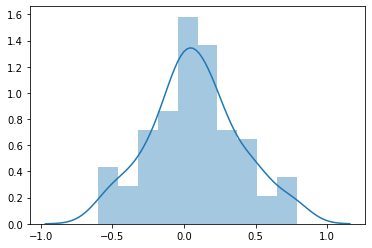

In [234]:
sns.distplot(tt3)

In [235]:
import numpy as np
import torch


def parameterized_truncated_normal(uniform, mu, sigma, a, b):
    normal = torch.distributions.normal.Normal(0, 1)

    alpha = (a - mu) / sigma
    beta = (b - mu) / sigma

    alpha_normal_cdf = normal.cdf(alpha)
    p = alpha_normal_cdf + (normal.cdf(beta) - alpha_normal_cdf) * uniform

    p = p.numpy()
    one = np.array(1, dtype=p.dtype)
    epsilon = np.array(np.finfo(p.dtype).eps, dtype=p.dtype)
    v = np.clip(2 * p - 1, -one + epsilon, one - epsilon)
    x = mu + sigma * np.sqrt(2) * torch.erfinv(torch.from_numpy(v))
    x = torch.clamp(x, a, b)

    return x


def truncated_normal(uniform):
    return parameterized_truncated_normal(uniform, mu=0.0, sigma=1.0, a=-2, b=2)


def sample_truncated_normal(shape=()):
    return truncted_normal(torch.from_numpy(np.random.uniform(0, 1, shape)))

In [236]:
tt4  = parameterized_truncated_normal(test_tensor, 0, 1/float(np.sqrt(test_tensor.shape[0])), -2, 2)

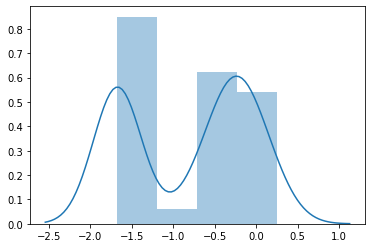

In [237]:
sns.distplot(tt4)

In [211]:
# Run on GPU if possible
try_gpu = True
if try_gpu:
    cuda = torch.cuda.is_available() 
    device = torch.device("cuda" if cuda else "cpu")
else:
    device = torch.device("cpu")
print("Using "+ str(device))

Using cuda


In [213]:
test_tensor = test_tensor.to(device)

In [214]:
test_tensor.is_cuda

True